In [28]:
from itertools import combinations

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm

In [70]:
true_diffs, sim_diffs, weighted_sim_diffs = [], [], []
samples_all, resamples_all = np.array([]), np.array([])

for _ in tqdm(range(1)):
    # simulate three "systems" (for now keep same dist params. can revisit)
    samples_a = np.random.normal(5, 1.5, 1000)
    samples_b = np.random.normal(10, 1.25, 1000)
    samples_c = np.random.normal(17.5, 1.5, 1000)

    # compute the true differences
    pairwise_diffs = [x.mean() - y.mean() for x, y in combinations([samples_a, samples_b, samples_c], 2)]
    true_diffs.append(pairwise_diffs)

    # this is the pool from which we resample
    samples_pooled = np.concatenate([samples_a, samples_b, samples_c])
    samples_all = np.concatenate([samples_all, samples_pooled])

    # naive bootstrap resample
    sim_pairwise_diffs = [
        np.random.choice(samples_pooled, 1000).mean() - np.random.choice(samples_pooled, 1000).mean()
        for _ in range(100)
    ]
    sim_diffs.append(sim_pairwise_diffs)
    resamples_all = np.concatenate([resamples_all, np.random.choice(samples_all, 1000)])
    
    # cleverer resampling?
    # idea here is to "break" the CLT behavior that emerges from the naive example
    # you sort the sampled data, then sample from regions of the sorted vector
    # where regions are defined as normal distributions over the indices of that vector,
    # the means sampled uniformly
    samples_pooled.sort()
    for _ in range(100):
        mean_a, mean_b = np.random.uniform(0, 1, 2)

        prob_a = norm.pdf(np.linspace(0, 1, 3000), mean_a, 0.1)
        prob_a = prob_a / prob_a.sum()
        prob_b = norm.pdf(np.linspace(0, 1, 3000), mean_b, 0.1)
        prob_b = prob_b / prob_b.sum()

        weighted_sim_pairwise_diffs = [
            np.random.choice(samples_pooled, 1000, p=prob_a).mean() - np.random.choice(samples_pooled, 1000, p=prob_b).mean()
            for _ in range(10)
        ]
        weighted_sim_diffs.append(weighted_sim_pairwise_diffs)
    

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:24<00:00, 24.74s/it]


TODO: 

The above weighted fix needs some work (primarily justifying the method and how the parameters are set), but seems to give decent results.

In terms of analysis, need to look at how the different "systems" are represented in the resamples, by the mean differences. Is there still a "reasonable" mix? How many examples are repeated? Can't just be drawing blood from a stone.

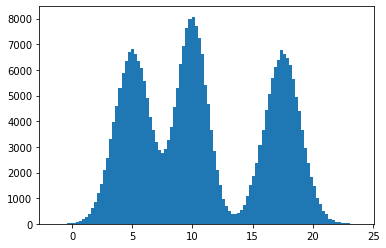

In [32]:
plt.hist(samples_all, bins=100)
plt.show()

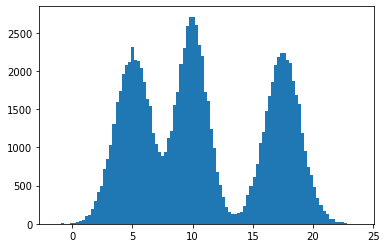

In [33]:
plt.hist(resamples_all, bins=100)
plt.show()

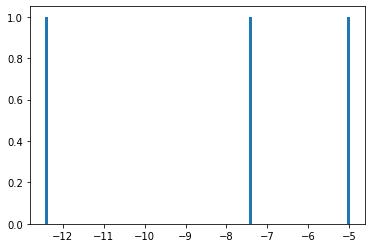

In [51]:
plt.hist(np.concatenate(true_diffs), bins=100)
plt.show()

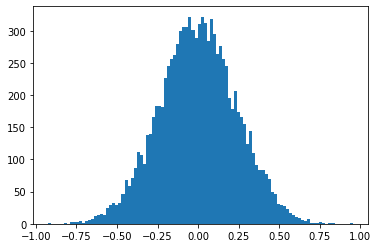

In [35]:
plt.hist(np.concatenate(sim_diffs), bins=100)
plt.show()

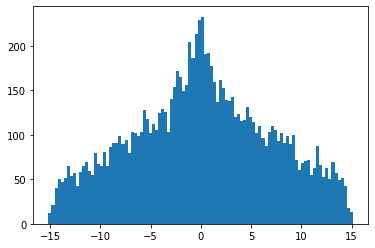

In [71]:
plt.hist(np.concatenate(weighted_sim_diffs), bins=100)
plt.show()

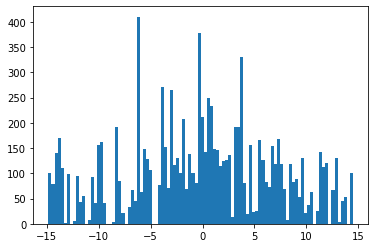

In [69]:
plt.hist(np.concatenate(weighted_sim_diffs), bins=100)
plt.show()

In [ ]:
resampled_pool = np.array([])
for _ in range(100):
    resampled_a = np.random.choice(samples_all, 1000, replace=True)
    resampled_b = np.random.choice(samples_all, 1000, replace=True)
    resampled_all = np.concatenate([resampled_a, resampled_b])
    resampled_pool = np.concatenate([resampled_pool, resampled_all])
plt.hist(resampled_pool, bins=100)
plt.show()